# Car Racing Game agent with neural network evolved with CMA-ES


In [1]:
using Plots
using Random
using LinearAlgebra
using Statistics

**Le simulateur :**

In [2]:
mutable struct track
    road::Array{Int64}
end

function track(n::Int64)
    track(zeros(n,n))
end

track

In [3]:
function right!(tr::track,pos::Int64,dir::Int64,larg::Int64,h::Int64)
    r = tr.road
    dir2 = dir%4
    if dir2 == 0
        for i in 0:larg-1
            r[pos + i*n : pos + (larg-1) + i*n] = [h+larg - j for j in 1:larg] #ones(larg)*(h+larg-i)
        end
        pos = pos-1
    end
    if dir2 == 1
        for i in 0:larg-1
            r[pos - i*n : pos + (larg-1) - i*n] = ones(larg)*(h+larg-i)
        end
        pos = pos+n
    end
    
    if dir2 == 2
        for i in 0:larg-1
            r[pos - i*n - (larg-1): pos - i*n] = [j for j in h:h+larg-1] #ones(larg)*(h+larg-i)
        end
        pos = pos+1
    end
    
    if dir2 == 3
        for i in 0:larg-1
            r[pos + i*n - (larg-1): pos + i*n] = ones(larg)*(h+larg-i)
        end
        pos = pos-n
    end
    
    r[pos]=h
    dir = dir-1
    
    (pos,dir)
end


function left!(tr::track,pos::Int64,dir::Int64,larg::Int64,h::Int64)
    r = tr.road
    dir2 = dir%4
    if dir2 == 0
        for i in 0:larg-1
            r[pos + i*n : pos + (larg-1) + i*n] = [j for j in h:h+larg-1] #ones(larg)*(h+i)
        end
        pos = pos+(larg)*(n+1)-n
    end
    
    if dir2 == 1
        for i in 0:larg-1
            r[pos - i*n : pos + (larg-1) - i*n] = ones(larg)*(h+i)
        end
        pos = pos-(larg)*(n-1)-1
    end
    
    if dir2 == 2
        for i in 0:larg-1
            r[pos - i*n - (larg-1): pos - i*n] = [h+larg - j for j in 1:larg] # ones(larg)*(h+i)
        end
        pos = pos-(larg)*(n+1)+n
    end
    
    if dir2 == 3
        for i in 0:larg-1
            r[pos + i*n - (larg-1): pos + i*n] = ones(larg)*(h+i)
        end
        pos = pos+(larg)*(n-1)+1
    end
    
    
    r[pos]=h
    dir = dir+1
    
    (pos,dir)
end

function droit!(tr::track,pos::Int64,dir::Int64,larg::Int64,long::Int64,h::Int64)
    r = tr.road
    dir2 = dir%4

    if dir2 == 0
        for i in 0:long-1
            r[pos + i*n : pos + (larg-1) + i*n] = ones(larg)*h
        end
        pos = pos+(long)*n
    end
    
    if dir2 == 1
        for i in 0:larg-1
            r[pos - i*n : pos - i*n + (long-1)] = ones(long)*h
        end
        pos = pos+long
    end
    
    if dir2 == 2
        for i in 0:long-1
            r[pos - i*n - (larg-1) : pos - i*n] = ones(larg)*h
        end
        pos = pos-(long)*n
    end
    
    if dir2 == 3
        for i in 0:larg-1
            r[pos + i*n - (long-1) : pos + i*n] = ones(long)*h
        end
        pos = pos-long
    end
    
    r[pos]=h
    (pos,dir)
end

function long!(tr::track,pos::Int64,dir::Int64,larg::Int64,h::Int64)
    (pos,dir) = short!(tr,pos,dir,larg,h)
    (pos,dir) = short!(tr,pos,dir,larg,h+3)
    (pos,dir) = short!(tr,pos,dir,larg,h+6)
    (pos,dir) = short!(tr,pos,dir,larg,h+9)
end

function short!(tr::track,pos::Int64,dir::Int64,larg::Int64,h::Int64)
    (pos,dir) = droit!(tr,pos,dir,larg,1,h)
    (pos,dir) = droit!(tr,pos,dir,larg,1,h+1)
    (pos,dir) = droit!(tr,pos,dir,larg,1,h+2)
end


short! (generic function with 1 method)

In [4]:
function build!(tr::track,L::Array{Int64})
    pos = 5010
    dir = 100
    tr.road[5001-n] = 1
    larg=6
    
    h = 400
    for i in L
        if i == 1
            (pos,dir) = short!(tr,pos,dir,larg,h)
            h = h + 3
        end
        
        if i == 2
            (pos,dir) = long!(tr,pos,dir,larg,h)
            h = h + 12
        end
        
        if i == 3
            (pos,dir) = right!(tr,pos,dir,larg,h)
            h = h+larg
        end
        
        if i == 4
            (pos,dir) = left!(tr,pos,dir,larg,h)
            h = h+larg
        end
        h = h + 1
    end
end

build! (generic function with 1 method)

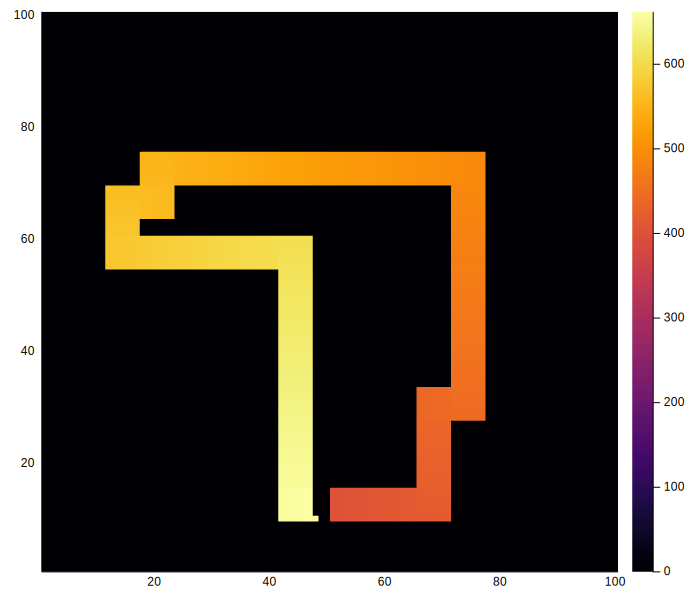

In [5]:
n = 100

track1 = track(n)
L = [1,2,4,2,3,4,2,2,2,4,2,2,2,2,4,3,4,1,4,2,2,3,2,2,1,2,4]


build!(track1,L)
plot(heatmap(track1.road),size=(700,600))

In [6]:
mutable struct car
    x::Float64
    y::Float64
    v::Float64
    angle::Float64
    a::Float64
    braq::Float64
    vmax::Float64
end

function car(x::Float64,y::Float64,angle::Float64)
    car(x,y,0,angle,5,3,20) #angle CI
end

car

In [7]:
function move!(Car::car,input::Int64,dt::Float64)
    delta = Car.v*dt
    
    if input == 1 || input == 2 || input == 8
        if Car.v<Car.vmax
            delta = delta + 0.5*Car.a*(dt^2)
            Car.v = Car.v + Car.a*dt
        end
    end
    
    if input == 4 || input == 5 || input == 6
        if Car.v>0
            delta = delta - 0.5*Car.a*(dt^2)
            Car.v = Car.v - Car.a*dt
        end
    end
    
    if input == 2 || input == 3 || input == 4
        braqv = Car.braq*(1 + 3*Car.v/Car.vmax)
        Car.angle = Car.angle - delta/braqv
    end
    
    if input == 6 || input == 7 || input == 8
        braqv = Car.braq*(1 + 3*Car.v/Car.vmax)
        Car.angle = Car.angle + delta/braqv
    end
    
    Car.x = Car.x + cos(Car.angle)*delta
    Car.y = Car.y + sin(Car.angle)*delta
end

move! (generic function with 1 method)

**Algorithme CMA-ES :**

In [8]:
mutable struct CMAES
    N::Int
    μ::Int
    λ::Int
    τ::Float64
    τ_c::Float64
    τ_σ::Float64
    population::Array{Array{Float64}}
    offspring::Array{Array{Float64}}
    F_μ::Array{Float64}
    F_λ::Array{Float64}
    C::Array{Float64}
    s::Array{Float64}
    s_σ::Array{Float64}
    σ::Float64
    E::Array{Float64}
    W::Array{Float64}
    x::Array{Float64}
end

In [9]:
function CMAES(;N=2, μ=1, λ=10, τ=sqrt(N), τ_c=N^2, τ_σ=sqrt(N))
    x = randn(N)
    population = fill(x, µ)
    offspring = Array{Array{Float64}}(undef, λ)
    F_µ = Inf .* ones(µ)
    F_λ = Inf .* ones(λ)
    C = Array(Diagonal{Float64}(I, N))
    s = zeros(N)
    s_σ = zeros(N)
    σ = 1.0
    E = zeros(N, λ)
    W = zeros(N, λ);
    CMAES(N, μ, λ, τ, τ_c, τ_σ, population, offspring, F_µ, F_λ, C, s, s_σ, σ, E, W, x)
end

CMAES

Fonction objectif :  
- On met un "-" car CMA-ES minimise la fitness  
- NN sera notre réseau de neurone  
- race() permet de tester le réseau de neurones sur un cicuit   

In [10]:
function objective(genes::Array{Float64})
    NN = SimpleNN(genes)
    fit=-race(NN,trCMAES,dt,ci)
    fit
end

objective (generic function with 1 method)

À chaque step on évalue les individus en appelant la fonction obj

In [11]:
function step!(c::CMAES, obj::Function)
    # L1
    sqrt_c = cholesky((c.C + c.C') / 2.0).U
    for i in 1:c.λ
        c.E[:,i] = randn(c.N)
        c.W[:,i] = c.σ * (sqrt_c * c.E[:,i])
        c.offspring[i] = c.x + c.W[:,i]
        c.F_λ[i] = obj(c.offspring[i])
    end
    # Select new parent population
    idx = sortperm(c.F_λ)[1:c.μ]
    for i in 1:c.μ
        c.population[i] = c.offspring[idx[i]]
        c.F_μ[i] = c.F_λ[idx[i]]
    end
    # L2
    w = vec(mean(c.W[:,idx], dims=2))
    c.x += w
    # L3
    c.s = (1.0 - 1.0/c.τ)*c.s + (sqrt(c.μ/c.τ * (2.0 - 1.0/c.τ))/c.σ)*w
    # L4
    c.C = (1.0 - 1.0/c.τ_c).*c.C + (c.s./c.τ_c)*c.s'
    # L5
    ɛ = vec(mean(c.E[:,idx], dims=2))
    c.s_σ = (1.0 - 1.0/c.τ_σ)*c.s_σ + sqrt(c.μ/c.τ_σ*(2.0 - 1.0/c.τ_σ))*ɛ
    # L6
    c.σ = c.σ*exp(((c.s_σ'*c.s_σ)[1] - c.N)/(2*c.N*sqrt(c.N)))
    c
end



step! (generic function with 1 method)

Fonction d'optimization globale :

In [12]:
function CMAES_NNOptimization(nbMaxIter::Int,fitMax::Int)
    best = nothing
    best_fit = -Inf
    c = CMAES(N=N, µ=10, λ=30, τ=sqrt(N), τ_c=N^2, τ_σ=sqrt(N))
    bestind=0
    for i in 1:nbMaxIter
        step!(c, objective)
        bestind = argmin(c.F_λ)
        maxfit = -c.F_λ[bestind] 
        println(i, " ", maxfit)
        if maxfit > best_fit
            best = copy(c.offspring[bestind])
            best_fit = maxfit
        end
        if best_fit == fitMax
            break
        end
    end
    c.offspring[bestind]
end

CMAES_NNOptimization (generic function with 1 method)

**Création du réseau de neurones :**

In [13]:
struct FCLayer
    w::Array{Float64}
    b::Array{Float64}
end

struct SimpleNN
    l1::FCLayer
    l2::FCLayer
    out::FCLayer
end

In [14]:
function SimpleNN(input::Int, N1::Int, N2::Int, output::Int)
    l1 = FCLayer(zeros(N1, input), zeros(N1))
    l2 = FCLayer(zeros(N2, N1), zeros(N2))
    out = FCLayer(zeros(output, N2), zeros(output))
    SimpleNN(l1, l2, out)
end

SimpleNN

- 6 entrées : 5 Distances aux murs, V   
- 6 sorties : accélérer, freiner, Vconstante, tourner à gauche, tourner à droite, tout droit 
- Deux couches cachées de 5 neurones chacunes

In [15]:
n_in =6;
n_l1=5;
n_l2=5;
n_out = 6;
NN = SimpleNN(n_in, n_l1, n_l2, n_out);

Il nous faut donc N genes pour coder notre réseau de neurones, avec :

In [16]:
N=n_in*n_l1+n_l1+n_l1*n_l2+n_l2+n_l2*n_out+n_out

101

Coder les poids et biais à partir de genes : 

In [17]:
function SimpleNN(genes::Array{Float64})
    NN = SimpleNN(n_in, 5, 5, n_out)
    layers = [NN.l1.w, NN.l1.b, NN.l2.w, NN.l2.b, NN.out.w, NN.out.b]
    L = 1
    j = 1
    for i in eachindex(genes)
        if j > length(layers[L])
            L += 1
            j = 1
        end
        layers[L][j] = genes[i]
        j += 1
    end
    NN
end

SimpleNN

Déterminer les sorties de notre réseau à partir des entrées :

In [18]:
function compute(inputs::Array{Float64}, NN::SimpleNN)
    x = NN.l1.w * inputs .+ NN.l1.b
    x = NN.l2.w * x .+ NN.l2.b
    x = NN.out.w * x .+ NN.out.b
    x
end

compute (generic function with 1 method)

Example :

In [19]:
genes = randn(N)
NN=SimpleNN(genes)
inputs=zeros(n_in)
compute(inputs,NN)

6-element Array{Float64,1}:
 -0.3404055887752748
 -5.422867257828739
  2.8823562387787405
  1.3627721663698646
 -1.1191562972800666
  6.436422084484623

**Communication NN - Simulation :**  
6 sorties :   
O1:accélérer, O2:freiner, O3:Vconstante, O4:tourner à gauche, O5: tourner à droite, O6: tout droit 

In [20]:
function getNNoutput(inputs::Array{Float64}, NN::SimpleNN)
    output=0
    outputs=compute(inputs,NN)
    accel=findmax(outputs[1:3])[2]
    dir=findmax(outputs[4:6])[2]
    if accel ==1 
        if dir == 6
            output= 1
        elseif dir==4
            output=2
        else
            output=8
        end
    elseif accel == 2
        if dir == 6
            output= 5
        elseif dir==4
            output=4
        else
            output=8
        end
            
    elseif accel==0
        if dir == 6
            output= 9
        elseif dir==4
            output=3
        else
            output=7
        end
    end  
    output
end

getNNoutput (generic function with 1 method)

Obtenir les entrées pour le NN :

In [21]:
function getState(car1::car) ### 5 distances ?
    inputs=zeros(6)
    inputs[6]=car1.v
    
    inputs
end 

getState (generic function with 1 method)

Fonction pour afficher la progression de la voiture : 

In [22]:
function affichage(X::Array{Float64},Y::Array{Float64},tr::track)
    for i in 1:size(X,1)
        x = Int(round(X[i]))
        y = Int(round(Y[i]))
        if x>0 && y>0
            tr.road[x,y]=150
        end
    end
    plot!(heatmap(tr.road),size=(700,600))
end

affichage (generic function with 1 method)

Example de track :

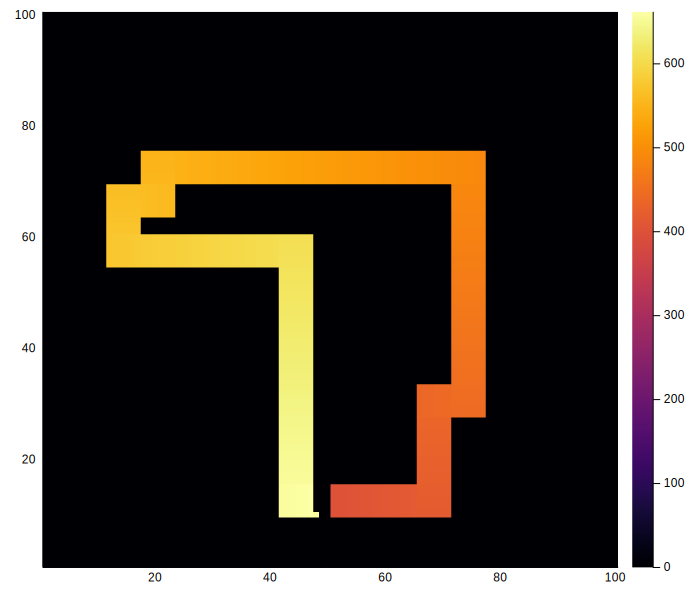

In [23]:
n = 100

track1 = track(n)
L = [1,2,4,2,3,4,2,2,2,4,2,2,2,2,4,3,4,1,4,2,2,3,2,2,1,2,4]
build!(track1,L)
plot(heatmap(track1.road),size=(700,600))

In [24]:
function race(NN::SimpleNN,tr::track,dt::Float64,ci::Array{Float64})
    tr2 = track(n)
    tr2.road = copy(tr.road)
    maxIter=300
    X=zeros(maxIter)
    Y=zeros(maxIter)
    plot(heatmap(tr2.road),size=(700,600))
    car1 = car(ci[1],ci[2],ci[3])
    canMoveB=true
    currentState=getState(car1)
    compteur=1
    fitness=1
    value=1
    while value>0
         fitness=value
         x = Int(round(car1.x))
         y = Int(round(car1.y))
         if x>0 && y>0
             value = tr.road[x,y]
         end
         X[compteur]=x
         Y[compteur]=y
         move!(car1,getNNoutput((currentState),NN),dt)
         currentState=getState(car1)
         compteur+=1
        if compteur>=300
            value=0
        end
    end
    affichage(X,Y,tr2)
    fitness ###=fitness
end

race (generic function with 1 method)

Stratégie d'apprentissage :
- I : on apprend au réseau de neuronne les bases de la conduite sur un circuit simple
- II : on affine le réseau sur deux autres circuits de complexité croissante 
- III : on test sur tout types de cicuits 


409


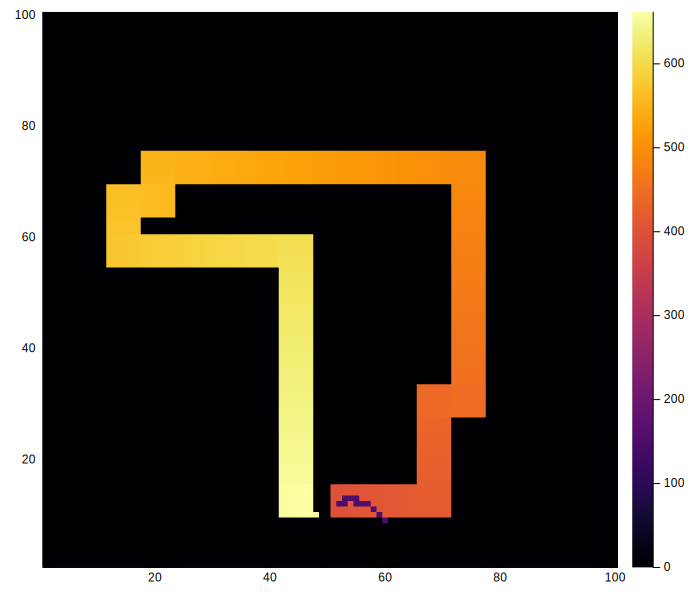

In [25]:
dt=0.06
n = 100

track1 = track(n)
L = [1,2,4,2,3,4,2,2,2,4,2,2,2,2,4,3,4,1,4,2,2,3,2,2,1,2,4]
build!(track1,L)
ci=[12.,52.,1.]

genes = randn(N)
NN=SimpleNN(genes)


println(race(NN,track1,dt,ci))
current()


1 415.0
2 424.0
3 418.0
4 424.0
5 422.0
6 421.0
7 422.0
8 424.0
9 422.0
10 424.0
11 424.0
12 424.0
13 421.0
14 422.0
15 424.0
16 424.0
17 424.0
18 424.0
19 424.0
20 421.0
21 424.0
22 424.0
23 424.0
24 421.0
25 424.0
424


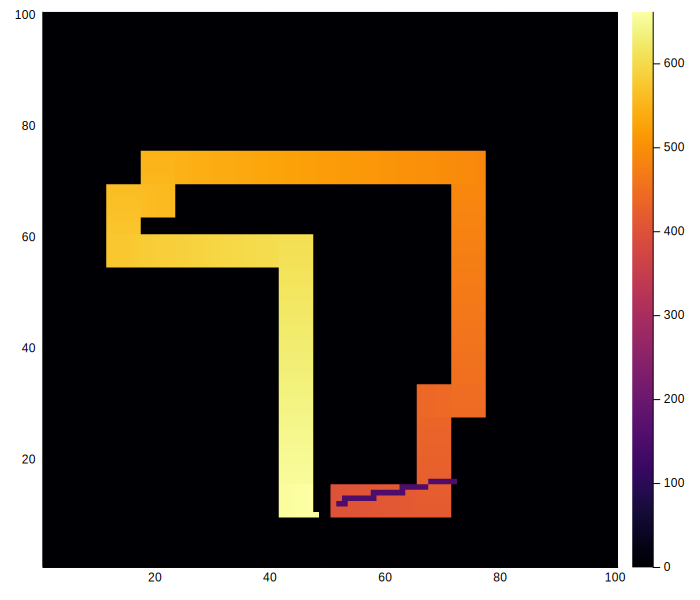

In [26]:
nbMaxIter=25
fitMax=500

dt=0.06
n = 100

trCMAES = track(n)
L = [1,2,4,2,3,4,2,2,2,4,2,2,2,2,4,3,4,1,4,2,2,3,2,2,1,2,4]
build!(trCMAES,L)
ci=[12.,52.,1.]

genes=CMAES_NNOptimization(nbMaxIter,fitMax)
NN = SimpleNN(genes)
println(race(NN,trCMAES,dt,ci))
current()

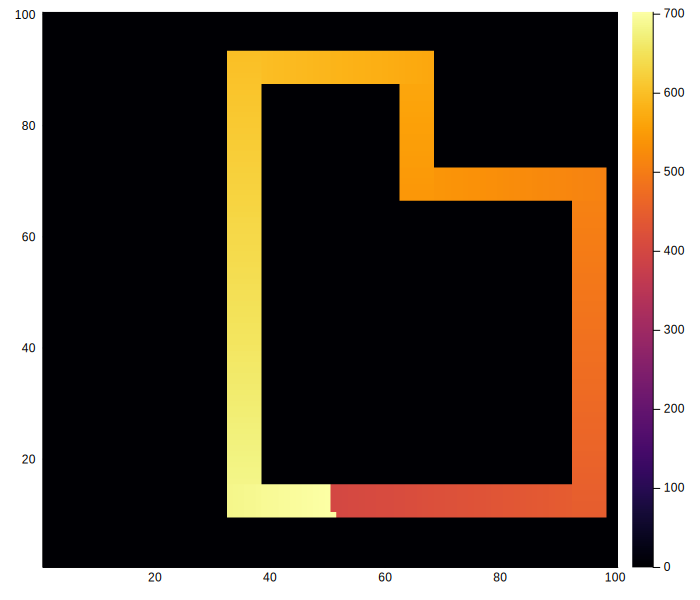

In [27]:
n = 100

trackFacile = track(n)
L = [1,2,2,2,1,4,1,2,2,2,2,4,2,2,3,2,1,4,2,2,4,2,2,2,2,2,2,4,2]
build!(trackFacile,L)
plot(heatmap(trackFacile.road),size=(700,600))

1 409.0
2 424.0
3 424.0
4 422.0
5 418.0
6 421.0
7 422.0
8 411.0
9 420.0
10 413.0
11 421.0
12 421.0
13 421.0
14 415.0
15 418.0
16 420.0
17 421.0
18 424.0
19 422.0
20 422.0
21 424.0
22 424.0
23 422.0
24 424.0
25 424.0
418


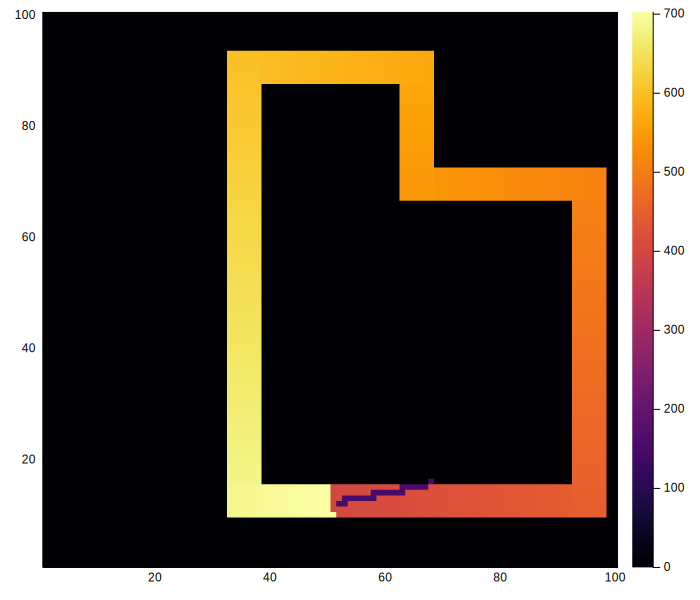

In [29]:
nbMaxIter=25
fitMax=500

n = 100
trackFacile = track(n)
L = [1,2,2,2,1,4,1,2,2,2,2,4,2,2,3,2,1,4,2,2,4,2,2,2,2,2,2,4,2]
build!(trackFacile,L)

ci=[12.,52.,1.]

genes=CMAES_NNOptimization(nbMaxIter,fitMax)
NN = SimpleNN(genes)
println(race(NN,trackFacile,dt,ci))
current()